In [1]:
import os
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image


In [2]:
data_path = "../data/raw"

# Nombre de Classes

In [3]:
classes = [d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))]
classes

['Bacterialblight', 'Brownspot', 'Leafsmut']

# Répartition de classes

In [4]:
class_counts = {}
for c in classes: 
    c_path = os.path.join(data_path, c)
    num_images = len([f for f in os.listdir(c_path) if os.path.isfile(os.path.join(c_path, f))])
    class_counts[c] = num_images
    
df_counts = pd.DataFrame(list(class_counts.items()), columns=["Classe", "Nombre d'images"])
df_counts

,Classe,Nombre d'images
0,Bacterialblight,1604
1,Brownspot,1620
2,Leafsmut,1460


# Exemples 

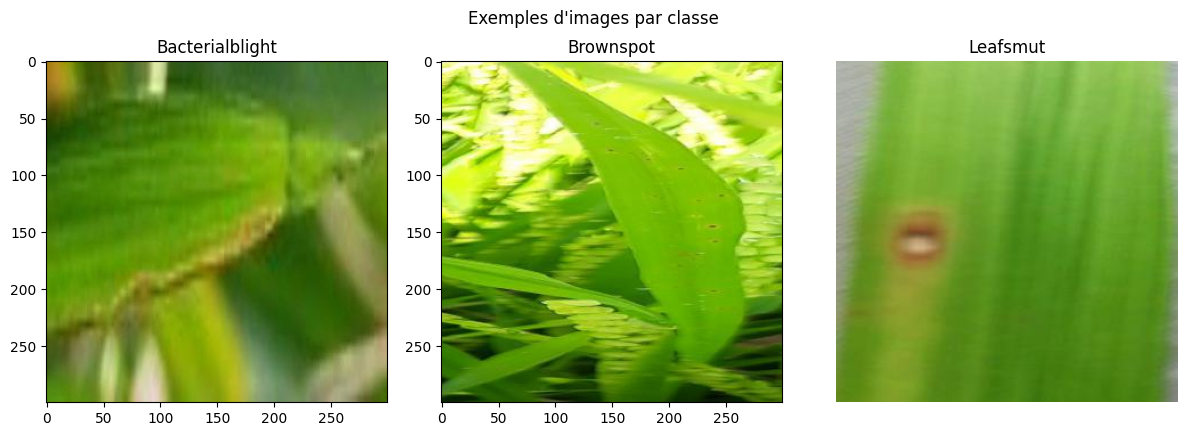

In [ ]:

plt.figure(figsize=(12, 8))
for i, c in enumerate(classes):  
    c_path = os.path.join(data_path, c)
    img_file = os.listdir(c_path)[0]
    img = Image.open(os.path.join(c_path, img_file))
    
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(c)
p   lt.axis('off')
plt.suptitle("Exemples d'images par classe")
plt.tight_layout()
plt.show()


# Format moyen

In [6]:
img_shapes = []
for c in classes: 
    c_path = os.path.join(data_path, c)
    images = os.listdir(c_path)
    for img_name in images:
        img = Image.open(os.path.join(c_path, img_name))
        img_shapes.append(img.size)

df_shapes = pd.DataFrame(img_shapes, columns=["Largeur", "Hauteur"])
df_shapes

,Largeur,Hauteur
0,300,300
1,300,300
2,300,300
3,300,300
4,300,300
...,...,...
4679,300,300
4680,300,300
4681,300,300
4682,300,300


In [7]:
df_shapes.describe()

,Largeur,Hauteur
count,4684.0,4684.0
mean,300.0,300.0
std,0.0,0.0
min,300.0,300.0
25%,300.0,300.0
50%,300.0,300.0
75%,300.0,300.0
max,300.0,300.0


In [8]:

extensions = set()  # éviter les doublons

for c in classes:
    c_path = os.path.join(data_path, c)
    for f in os.listdir(c_path):
        ext = os.path.splitext(f)[1].lower()  # .jpg, .png, etc.
        if ext:
            extensions.add(ext)

print("Extensions :", extensions)

Extensions : {'.jpg'}


# Vérification fichiers corrompus

In [9]:
erreurs = []
for c in classes: 
    c_path = os.path.join(data_path, c)
    for f in os.listdir(c_path):
        try: 
            img = Image.open(os.path.join(c_path, f))
            img.verify()
        except e as Exception :
            erreurs.append(os.path.join(c_path, f))

print(f"{len(erreurs)} images corrompues")
if erreurs:
    print(f"exemples : ", erreurs[:5])

0 images corrompues
